In [6]:
import json

# Load your JSON file
with open("hayday_goods_with_storage.json", "r") as f:
    goods_data = json.load(f)

def base_ingredients(name):
    from treelib import Node, Tree

    tree = Tree()
    tree.create_node(name,name)  # No parent means its the root node
    base_ings = {}
    queue = []

    # Add initial ingredients with their quantities
    for ing, ing_qty in goods_data[name]['ingredients'].items():
        temp = tree.create_node(ing+ " ("+ str(ing_qty) + ")", parent=name)
        if(ing in goods_data):
            queue.append((ing, ing_qty,0, temp.identifier, goods_data[name]['time']+goods_data[ing]['time']*ing_qty,goods_data[name]['xp']+goods_data[ing]['xp']*ing_qty))
        else:
             queue.append((ing, ing_qty,0, temp.identifier, 0,0))

    record = []
    total_time = 0
    total_xp = 0
    while queue:
        current, qty, depth, identifier, time,xp = queue.pop()
        if(len(record) == depth):
            record.append({current:qty})
        else:
            if current in record[depth]:
                record[depth][current] += qty
            else:
                 record[depth][current] = qty
        
        # If current is not in goods_data → it's a base item
        if current not in goods_data:
            base_ings[current] = base_ings.get(current, 0) + qty
            total_time += time
            total_xp += xp
        elif current in goods_data[current]['ingredients'] or len(goods_data[current]['ingredients'].keys())== 0:
            base_ings[current] = base_ings.get(current, 0) + qty
            total_time += time
            total_xp += xp
        else:
            # Break down further: multiply quantity
            for ing, ing_qty in goods_data[current]['ingredients'].items():
                temp = tree.create_node(ing+ " ("+ str(ing_qty) + ")", parent=identifier)
                if(ing in goods_data):
                    queue.append((ing, ing_qty,0, temp.identifier, time+goods_data[ing]['time']*ing_qty,xp+goods_data[ing]['xp']*ing_qty))
                else:
                    queue.append((ing, ing_qty,0, temp.identifier, time,xp))
            
    #tree.show()
   
   
    return record, base_ings, tree, total_time,total_xp
# Example usage
#_, base_ings = base_ingredients("Bacon fondue")

#print(base_ings)
"""
sorted_list = []
for name in goods_data.keys():
    _, base_ings, tree = base_ingredients(name)
    sum = 0
    for ings in base_ings:
        sum += base_ings[ings]
    sorted_list.append([tree,sum])
   
    

sorted_list = sorted(sorted_list, key=lambda x: x[1])
for i in range(1,10):
    sorted_list[-i][0].show()
 #   print(sorted_list[-i][1])
"""


'\nsorted_list = []\nfor name in goods_data.keys():\n    _, base_ings, tree = base_ingredients(name)\n    sum = 0\n    for ings in base_ings:\n        sum += base_ings[ings]\n    sorted_list.append([tree,sum])\n   \n    \n\nsorted_list = sorted(sorted_list, key=lambda x: x[1])\nfor i in range(1,10):\n    sorted_list[-i][0].show()\n #   print(sorted_list[-i][1])\n'

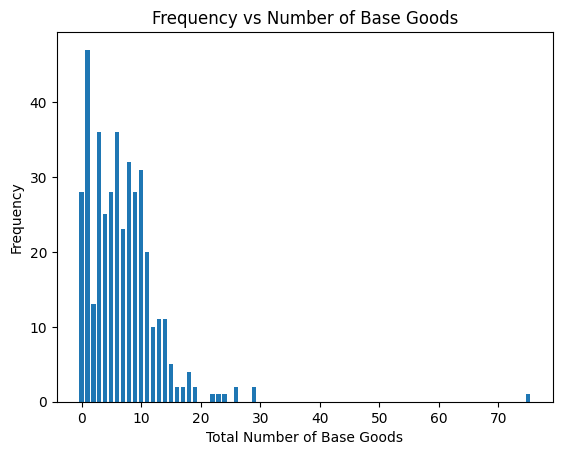

In [7]:
import collections
import matplotlib.pyplot as plt

# bar_data contains the number of base goods required for each product
bar_data = []
for name in goods_data.keys():
    _, base_ings, tree, time, xp = base_ingredients(name)
    sum=0
    for i in base_ings:
        sum+= base_ings[i]
    
    bar_data.append(sum)

# Count frequency
counter = collections.Counter(bar_data)

# Sort by x
x_vals = sorted(counter.keys())
y_vals = [counter[x] for x in x_vals]

# Plot
plt.title("Frequency vs Number of Base Goods")
plt.ylabel("Frequency")
plt.xlabel("Total Number of Base Goods")
plt.bar(x_vals, y_vals, width=0.7)

plt.show()


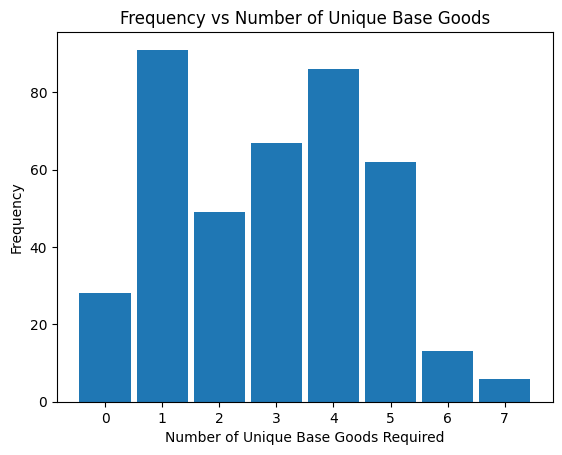

In [8]:
bar_data2 = []
for name in goods_data.keys():
    _, base_ings, tree, time, xp = base_ingredients(name)
    bar_data2.append(len(base_ings))

counter2 = collections.Counter(bar_data2)
x_vals2 = sorted(counter2.keys())
y_vals2 = [counter2[x] for x in x_vals2]

plt.title("Frequency vs Number of Unique Base Goods")
plt.ylabel("Frequency")
plt.xlabel("Number of Unique Base Goods Required")
plt.bar(x_vals2, y_vals2, width=0.9)
plt.show()


2
9
2
6
5
4
9
15
27
6
39
7
6
4
41
63
10
20
74
147
57
10
12
57
12
105
0
11
21
88
67
12
181
23
31
105
0
97
65
73
116
132
183
0
148
245
335
0
0
0
33
14
46
39
45
175
0
154
12
0
0
0
0
0
0
97
215
119
29
154
16
30
52
0
0
0
43
73
15
33
108
159
0
22
159
20
275
0
27
324
85
40
14
252
321
47
232
422
0
57
209
94
358
79
212
288
230
332
0
396
35
142
325
79
347
0
106
368
155
92
0
0
323
211
4
176
219
462
314
516
153
216
52
160
113
333
16
306
62
0
0
8
130
103
257
153
138
156
6
17
213
10
57
307
539
6
334
0
179
14
784
430
541
406
84
6
158
382
237
920
464
0
10
526
206
828
300
199
226
836
207
453
6
217
0
372
302
763
174
26
747
860
330
16
126
1862
88
649
122
251
112
280
259
6
149
0
202
66
349
246
198
318
400
6
134
27
335
242
14
111
419
804
221
18
422
530
88
0
414
197
497
229
129
136
571
107
205
209
169
390
176
12
149
652
377
115
683
527
380
420
458
18
74
247
359
49
111
319
707
14
191
400
756
593
318
136
8
371
631
572
12
25
444
268
198
180
12
38
37
237
139
103
435
533
246
406
509
767
125
248
224
276
0
191
89


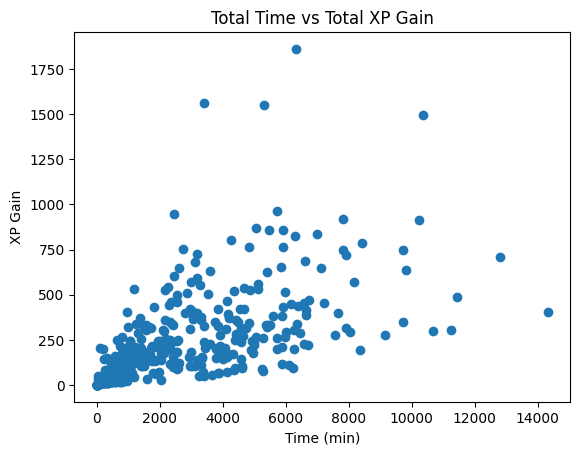

In [9]:

times = []
xps = []
for name in goods_data.keys():
    _, base_ings, tree,time,xp = base_ingredients(name)
    times.append(time)
    xps.append(xp)
    print(xp)
plt.title("Total Time vs Total XP Gain")

plt.xlabel("Time (min)")
plt.ylabel("XP Gain")
plt.scatter(times,xps)
plt.show()

In [10]:

sorted_list = []
for name in goods_data.keys():
    _, base_ings, tree,time,xp = base_ingredients(name)
    sum = 0
   
    sorted_list.append([tree,time,xp])
   
    

sorted_list = sorted(sorted_list, key=lambda x: x[1])
for i in range(1,5):
    sorted_list[-i][0].show()
    print(sorted_list[-i][1])
    print(sorted_list[-i][2])


Jelly beans
├── Blackberry jam (1)
│   └── Blackberry (3)
├── Raspberry jam (1)
│   └── Raspberry (3)
└── White sugar (1)
    └── Sugarcane (2)

14320
406
Chocolate fondue
├── Chocolate (1)
│   ├── Cacao (3)
│   ├── Cream (1)
│   │   └── Milk (1)
│   │       └── Cow feed (1)
│   │           ├── Corn (1)
│   │           └── Soybean (2)
│   └── White sugar (1)
│       └── Sugarcane (2)
└── Strawberry (3)

12810
707
Chocolate roll
├── Cacao (5)
├── Cream (1)
│   └── Milk (1)
│       └── Cow feed (1)
│           ├── Corn (1)
│           └── Soybean (2)
├── Mint (3)
└── Wheat (3)

11421
488
Chocolate
├── Cacao (3)
├── Cream (1)
│   └── Milk (1)
│       └── Cow feed (1)
│           ├── Corn (1)
│           └── Soybean (2)
└── White sugar (1)
    └── Sugarcane (2)

11245
307


In [11]:

sorted_list = []
for name in goods_data.keys():
    _, base_ings, tree,time,xp = base_ingredients(name)
    sum = 0
    sum = 0
    for b in base_ings:
        sum += base_ings[b]
    sorted_list.append([tree,len(base_ings)])
   
    

sorted_list = sorted(sorted_list, key=lambda x: x[1])
for i in range(1,15):
    sorted_list[-i][0].show()


Cheese fondue
├── Cheese (1)
│   └── Milk (3)
│       └── Cow feed (1)
│           ├── Corn (1)
│           └── Soybean (2)
├── Mushroom (2)
├── Potato bread (1)
│   ├── Butter (1)
│   │   └── Milk (2)
│   │       └── Cow feed (1)
│   │           ├── Corn (1)
│   │           └── Soybean (2)
│   ├── Egg (3)
│   │   └── Chicken feed (1)
│   │       ├── Corn (1)
│   │       └── Wheat (2)
│   ├── Potato (2)
│   └── White sugar (1)
│       └── Sugarcane (2)
└── Tomato (1)

Spicy pasta
├── Chili pepper (3)
├── Fresh pasta (3)
│   ├── Egg (1)
│   │   └── Chicken feed (1)
│   │       ├── Corn (1)
│   │       └── Wheat (2)
│   └── Wheat (2)
├── Onion (2)
└── Tomato sauce (1)
    ├── Brown sugar (1)
    │   └── Sugarcane (1)
    ├── Lemon (1)
    └── Tomato (2)

Taco
├── Bacon (1)
│   └── Pig feed (1)
│       ├── Carrot (2)
│       └── Soybean (1)
├── Corn bread (1)
│   ├── Corn (2)
│   └── Egg (2)
│       └── Chicken feed (1)
│           ├── Corn (1)
│           └── Wheat (2)
└── Salsa (1)
    

In [12]:

sorted_list = []
for name in goods_data.keys():
    _, base_ings, tree,time,xp = base_ingredients(name)
    sum = 0
   
    sorted_list.append([tree,time])
   
    

sorted_list = sorted(sorted_list, key=lambda x: x[1])
for i in range(1,5):
    sorted_list[-i][0].show()
    print(sorted_list[-i][1])

Jelly beans
├── Blackberry jam (1)
│   └── Blackberry (3)
├── Raspberry jam (1)
│   └── Raspberry (3)
└── White sugar (1)
    └── Sugarcane (2)

14320
Chocolate fondue
├── Chocolate (1)
│   ├── Cacao (3)
│   ├── Cream (1)
│   │   └── Milk (1)
│   │       └── Cow feed (1)
│   │           ├── Corn (1)
│   │           └── Soybean (2)
│   └── White sugar (1)
│       └── Sugarcane (2)
└── Strawberry (3)

12810
Chocolate roll
├── Cacao (5)
├── Cream (1)
│   └── Milk (1)
│       └── Cow feed (1)
│           ├── Corn (1)
│           └── Soybean (2)
├── Mint (3)
└── Wheat (3)

11421
Chocolate
├── Cacao (3)
├── Cream (1)
│   └── Milk (1)
│       └── Cow feed (1)
│           ├── Corn (1)
│           └── Soybean (2)
└── White sugar (1)
    └── Sugarcane (2)

11245
